Data Mining: Basic Concepts - WS'21/22
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Prof. Dr. Daniel Keim, Eren Cakmak, Fabian Sperrle
```
__Organize in teams of 2 people, return the exercise by Thu, Nov 18th, 2021 (11:59 PM) using ILIAS__

---

Assignment 04 in Python
---------------
- ___Please put your names and student IDs here___:
    - Viet Ha, 01/1143223
    - Zheng Zhou, 01/770880

---

#### Exercise 1: Naïve Bayes Classification

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|No|
|2|US|US|No|No|No|
|3|AS|AS|No|Yes|No|
|4|AS|EU|No|Yes|Yes|
|5|AS|AS|Yes|Yes|Yes|
|6|AS|AS|Yes|No|No|
|7|EU|AS|Yes|No|Yes|
|8|US|EU|No|Yes|No|
|9|US|AS|Yes|Yes|No|
|10|EU|EU|Yes|Yes|Yes|
|11|US|EU|Yes|No|Yes|
|12|US|EU|No|No|No|
|13|US|US|Yes|Yes|Yes|
|14|AS|EU|No|No|No|

* EU = Europe; US = United States; AS = Asia

##### __(a) According to the lecture slides, a Naïve Bayes Classifier assumes class conditional independence. Explain what this means and why that might be a problem__

```
Class conditional independence assumption allows us to reduce the computation by writing:
        P(X|C) = P(x1|C)*P(x2|C)...*P(x_n|C)
This formulation states that all attributes of X are independent events. In reality, this assumption may not hold as 
attributes are somewhat correlated such as: age and income; location and house price,...
Some attributes are independent but not conditionally independent such as: people age and education level are independent, but if we know a person are 12 years old, the probability that he has a bachelor degree is low. 
```

##### __(b) Calculate all conditional probabilities of a  Naïve Bayes Classifier with the given data by hand.__

```
6 spams, 8 not spams
P(TZ=US|spam)  = 2/6 = 1/3
P(TZ=US|!spam) = 5/8
P(TZ=AS|spam)  = 2/6 = 1/3
P(TZ=AS|!spam) = 3/8
P(TZ=EU|spam)  = 2/6 = 1/3
P(TZ=EU|!spam) = 0

P(GL=US|spam)  = 1/6
P(GL=US|!spam) = 2/8 = 1/4
P(GL=AS|spam)  = 2/6 = 1/3
P(GL=AS|!spam) = 3/8
P(GL=EU|spam)  = 3/6 = 1/2
P(GL=EU|!spam) = 3/8

P(SS=yes|spam) = 5/6
P(SS=yes|!spam)= 2/8 = 1/4
P(SS=no|spam)  = 1/6
P(SS=no|!spam) = 6/8 = 3/4

P(SB=yes|spam) = 4/6 = 2/3
P(SB=yes|!spam)= 4/8 = 1/2
P(SB=no|spam)  = 2/6 = 1/3
P(SB=no|!spam) = 4/8 = 1/2
```

##### __(c)	Calculate the posterior probabilities and classify the following three E-Mails by means of the trained classifier:__
    a. E-mail A = (US, Asia, Yes, No)
    b. E-mail B = (Asia, US, Yes, Yes)
    c. E-mail C = (Asia, EU, No, Yes)


```
P(spam)  = 6/14 = 3/7
P(!spam) = 8/14 = 4/7
> Mail A: P(US, Asia, YES, No | spam) = (3/7) * (1/3) *  (1/3) * (5/6) * (1/3) = 0,01322751
> Mail A: P(US, Asia, YES, No | !spam) = (4/7) * (5/8) * (3/8) * (1/4) * (1/2) = 0,01674107
> --> Mail A is classified as no spam since this probability is higher.
>
> Mail B: P(Asia, US, Yes, Yes | spam)  = (3/7) * (1/3) * (1/6) * (5/6) * (2/3) = 0,0132275
> Mail B: P(Asia, US, Yes, Yes | !spam) = (4/7) * (3/8) * (1/4) * (1/4) * (1/2) = 0,0066964
> --> Mail B is classified as spam since this probability is higher.
> 
> Mail C: P(EU, EU, No, No | spam)  = (3/7) * (1/3) * (1/2) * (1/6) * (1/3) = 0,0039682
> Mail C: P(EU, EU, No, No | !spam) = (4/7) * (0/5) * (3/8) * (3/4) * (1/2) = 0
> --> Mail C is classified as spam since this probability is higher.
> 
```

##### __d) What problem do you encounter when classifying Email C and which technique could you use to overcome this problem?__

```
There is no data points with attribute GeoLocation=EU classified as no spam, this makes the probaility of no spam class is always 0, so every new data point with GeoLocation=EU will be classify as spam. Use additive-smoothing to overcome this problem.
```

---

#### Exercise 2: Pruning Decision Trees 

__We will investigate the “diabetes.csv” dataset. Read the “description.txt” to understand the individual columns. Use the already imported libraries for this exercise.__

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

##### __(a) Load the dataset and use a sampling method to split the dataset into a training (80% rows) and test (20% rows) dataset. The target column is the last column.__
_(Hint: use the `sklearn.model_selection.train_test_split` and set the parameter to `random_state = 0`)_

In [5]:
df=pd.read_csv('diabetes.csv', header=None)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df[8], test_size=0.2, random_state=0)

##### __(b) Use the training dataset to train a decision tree. Plot the tree.__

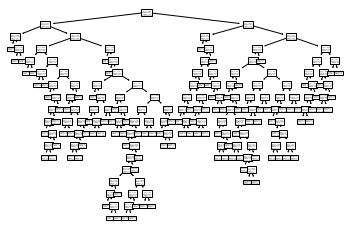

In [72]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X_train, y_train)
tree.plot_tree(clf)
plt.show()

##### __(c)	Measure the accuracy of the decision tree on the training and test dataset. The accuracy is one metric for evaluating classification models. `Accuracy = (number of correct predictions) / (total number of predictions)`.__ 
_(Hint: use the `DecisionTreeClassifier.score` method)_

In [73]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7077922077922078

In [74]:
# on test set, train set
clf.score(X_test, y_test), clf.score(X_train, y_train)

(0.7077922077922078, 1.0)

##### __(d) Use prepruning and train a new decision tree, by using the `max_depth` parameter for the `DecisionTreeClassifier`. Experiment with different values and select a depth limit. Plot the pruned decision tree.__

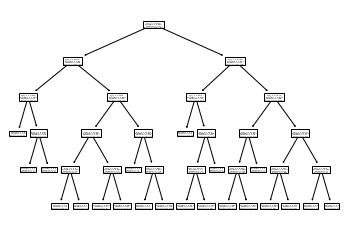

In [6]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf1.fit(X_train, y_train)
tree.plot_tree(clf1)
plt.show()

In [7]:
# on test set, train set
clf1.score(X_test, y_test), clf1.score(X_train, y_train)

(0.7402597402597403, 0.8110749185667753)

##### __(e) Measure the accuracy of the pruned decision tree on the training and test dataset.__

In [8]:
# on test set, train set
clf1.score(X_test, y_test)

0.7402597402597403

Result: Higher accuracy on test set, lower accuracy on train set compared to decision tree without pruning

##### __(f) Explain and discuss the results from c) and e).__

```
Overfitting for the not pruned decision tree. Without pruning the decision tree over-learns the training set including peculiarities and outliers, thus, loosing the generality.

Pruning increases the accuracy on the testing dataset and reduces the accuracy on the training dataset. 
```

---

#### Exercise 3: Naïve Bayes Classification

__In this exercise we will use the Naïve Bayes classification methods on a real data set. We will classify the digits dataset (see https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)__

<Figure size 432x288 with 0 Axes>

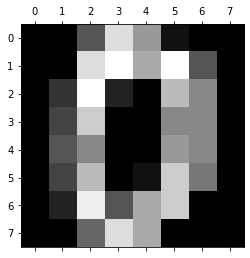

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

## example plot of one of the digits
import matplotlib.pyplot as plt 
plt.gray()
plt.matshow(digits.images[0]) 
plt.show() 

##### __(a) Split the dataset into a training (80% rows) and test (20% rows) data. The data column is `digits.data`and the target column `digits.target`.__
_(Hint: use the `sklearn.model_selection.train_test_split` and set the parameter to `random_state = 0`)_

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [10]:
digits.data, digits.target

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

##### __(b) Generate a model and fit the dataset on the classifier.__ 
_(Hint: use already implemented version in `sklearn.naive_bayes.GaussianNB`)_

In [12]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

##### __(c) Compute the accuracy on the train and test data using the trained model.__ 
_(Hint: use already the `GaussianNB.predict` and `sklearn.metrics.accuracy_score` method for this)_

In [13]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.825